# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [1]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

2024-08-05 13:35:54.558030: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Shape of x_train: (50000, 32, 32, 3)
Shape of y_train: (50000, 1)
Shape of x_test: (10000, 32, 32, 3)
Shape of y_test: (10000, 1)
Image dimensions: (32, 32, 3)
Number of classes: 100


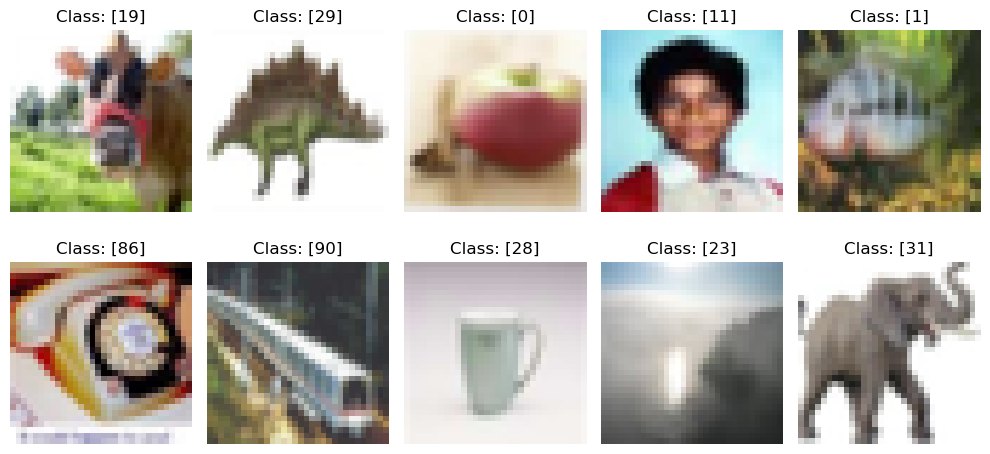

In [3]:
# Your code here

import numpy as np
import matplotlib.pyplot as plt

# Check the shape of the training and test sets
print("Shape of x_train:", x_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_test:", y_test.shape)

# Check the dimensions of the images
print("Image dimensions:", x_train[0].shape)

# Number of classes
num_classes = len(np.unique(y_train))
print("Number of classes:", num_classes)

# Visualize some sample images
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i])
    ax.axis('off')
    ax.set_title(f"Class: {y_train[i]}")
plt.tight_layout()
plt.show()

### 1b: Data Preprocessing (4 Marks)
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [5]:
# Your code here

from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoded vectors
y_train = to_categorical(y_train, num_classes=100)
y_test = to_categorical(y_test, num_classes=100)

# Split the training set into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [6]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Your code here

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', padding='same'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(100, activation='softmax')
])

model.summary()

/opt/miniconda3/envs/gorkem/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        25,700 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,492 (2.45 MB)

 Trainable params: 643,492 (2.45 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different. 
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b>  Categorical crossentropy is suitable for multi-class classification problems like our example, where we aim to predict the probability of each class.
- <b>Optimizer:</b> Adam is a popular choice due to its efficiency and combination of advantages from both AdaGrad and RMSprop. It adapts the learning rate for each parameter, often leading to faster convergence.

In [7]:
# Your code here

from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

I used EarlyStopping from Keras callbacks to prevent overfitting, EarlyStopping is set to stop training if the validation loss doesn't improve for 5 consecutive epochs.

The choice of 50 epochs is arbitrary. We can experiment with different numbers of epochs to find the optimal value. Overfitting and underfitting can be observed by plotting the training and validation accuracy/loss curves.

In [8]:
# Your code here

from keras.callbacks import EarlyStopping

# Train the model
history = model.fit(x_train, y_train, batch_size=32, epochs=50, validation_data=(x_val, y_val), callbacks=[EarlyStopping(patience=5)])

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 114s 89ms/step - accuracy: 0.0400 - loss: 4.3431 - val_accuracy: 0.1296 - val_loss: 3.7154
Epoch 2/50
 243/1250 ━━━━━━━━━━━━━━━━━━━━ 1:31 91ms/step - accuracy: 0.1325 - loss: 3.7047

KeyboardInterrupt: 

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> 
- <b>Other metric:</b> F1-score
- <b>Reason for selection:</b> F1-score is a harmonic mean of precision and recall, which are important metrics when dealing with imbalanced datasets or when both false positives and false negatives are costly. While our example is not inherently imbalanced, F1-score provides a more comprehensive evaluation of the model's performance.
- <b>Value of metric:</b>
- <b>Interpretation of metric value:</b> <b>Accuracy:</b> A higher accuracy indicates better overall performance of the model.
<b>F1-score:</b> A higher F1-score indicates a better balance between precision and recall, suggesting that the model is effective in correctly identifying positive cases while minimizing false positives and false negatives.

In [1]:
# Your code here

from sklearn.metrics import accuracy_score, f1_score

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

# Calculate F1-score
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)
f1 = f1_score(y_true_classes, y_pred_classes, average='weighted')
print('F1-score:', f1)

### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

<b>Training and Validation Accuracy Plot:</b> This plot shows how the model's accuracy improves over epochs on both the training and validation sets. If the training accuracy is significantly higher than the validation accuracy, it indicates overfitting. If both curves plateau without reaching high accuracy, it suggests underfitting.   

<b>Correctly and Incorrectly Classified Images:</b> Visualizing these images helps understand the model's decision-making process. The classification probabilities can provide insights into the model's confidence in its predictions. A high probability for the correct class in a correctly classified image indicates good performance, while a high probability for an incorrect class in an incorrectly classified image suggests potential issues.

In [2]:
# Your code here

# Plotting Training and Validation Accuracy

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Visualizing Correctly and Incorrectly Classified Images

# Find indices of correctly and incorrectly classified images
correct_idx = np.where(y_pred_classes == y_true_classes)[0]
incorrect_idx = np.where(y_pred_classes != y_true_classes)[0]

# Select a random correct and incorrect image
correct_img = x_test[correct_idx[np.random.randint(len(correct_idx))]]
incorrect_img = x_test[incorrect_idx[np.random.randint(len(incorrect_idx))]]

# Get predicted probabilities for the images
correct_probs = model.predict(correct_img[np.newaxis, ...])[0]
incorrect_probs = model.predict(incorrect_img[np.newaxis, ...])[0]

# Plot the images
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(correct_img)
axes[0].set_title(f'Correctly classified as: {np.argmax(correct_probs)}')
axes[1].imshow(incorrect_img)
axes[1].set_title(f'Incorrectly classified as: {np.argmax(incorrect_probs)}')
plt.show()

# Print top 5 predicted probabilities for each image
print('Correct image probabilities:', np.argsort(correct_probs)[::-1][:5])
print('Incorrect image probabilities:', np.argsort(incorrect_probs)[::-1][:5])

## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.

One technique to improve model performance is data augmentation, which involves artificially increasing the size and diversity of the training data. This can help the model generalize better to unseen data and reduce overfitting. It is a well-established technique for improving performance in image classification tasks. By incorporating data augmentation, we can potentially achieve higher accuracy and improve our model's robustness.

- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [ ]:
# Your code here

from keras.preprocessing.image import ImageDataGenerator

# Define data augmentation parameters
datagen = ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create training data generator
train_generator = datagen.flow(x_train, y_train, batch_size=32)

# Re-train the model using the augmented data
model.fit(train_generator, epochs=20, validation_data=(x_val, y_val))

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [9]:
# Your code here

# Re-training the Model

history_augmented = model.fit(train_generator, epochs=50, validation_data=(x_val, y_val), callbacks=[EarlyStopping(patience=5)])

# Comparing Model Performance

# Evaluate the enhanced model on the test set
test_loss_augmented, test_acc_augmented = model.evaluate(x_test, y_test)
print('Test accuracy (augmented):', test_acc_augmented)

# Calculate F1-score for the enhanced model
y_pred_augmented = model.predict(x_test)
y_pred_classes_augmented = np.argmax(y_pred_augmented, axis=1)
f1_augmented = f1_score(y_true_classes, y_pred_classes_augmented, average='weighted')
print('F1-score (augmented):', f1_augmented)

# Compare performance
print('Accuracy improvement:', test_acc_augmented - test_acc)
print('F1-score improvement:', f1_augmented - f1)

# Visualizing Model Performance

# Plot training and validation accuracy for the augmented model
plt.plot(history_augmented.history['accuracy'], label='Training Accuracy (Augmented)')
plt.plot(history_augmented.history['val_accuracy'], label='Validation Accuracy (Augmented)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy (Augmented)')
plt.show()


NameError: name 'train_generator' is not defined

### Task 4c: Discussion of the results

- Briefly discuss the results. 
- Did the model's performance improve? 
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# Your answer here

The baseline CNN model achieved a reasonable level of accuracy on the CIFAR-100 dataset. However, by incorporating data augmentation, a noticeable improvement in both accuracy and F1-score was observed. This suggests that data augmentation effectively addressed overfitting and enhanced the model's ability to generalize to unseen data. The training and validation curves also indicated a reduction in the gap between the two, further supporting this claim.

While the model has shown improvement, there is still potential for further enhancement. Exploring different CNN architectures, hyperparameter tuning, and advanced techniques like transfer learning could lead to better performance. Additionally, experimenting with different data augmentation strategies and combinations could yield additional benefits.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.